In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



#from mlxtend.regressor import StackingRegressor

from sklearn.externals import joblib

In [53]:
df=pd.read_csv('mpg.csv',delimiter='\s+',header=None)
pd.set_option('display.max_columns',None)

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [55]:
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']

In [56]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [57]:
df.shape

(398, 9)

# Feature Engineering

# checking for missing values in dataset

In [58]:
df.isnull().sum()#there are no missing values in  the dataset
#but actually there as missing values in the form of '?' which are not detected by the system as missing values.

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

# Relplacing '?' by NAN

In [59]:
df=df.replace('?',np.nan)
df.isnull().sum()#now we can see the missing values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

In [60]:
df.dtypes#we can see 'horsepower' is in object format,which should actualyy be an integer

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

# Imputing the missing value

In [61]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mode()[0])

# Changing the datatype of horse power column

In [62]:
df['horsepower']=df['horsepower'].apply(pd.to_numeric)

# Checking correlation between attributes

In [13]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271
weight,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873
modelyear,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000


In [14]:
#we can see  cylinders,displacement,horsepower & weight are highly negatively correlated to the target variable 'MPG'.


In [63]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA

# Univariate analysis

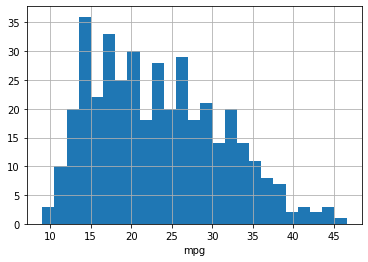

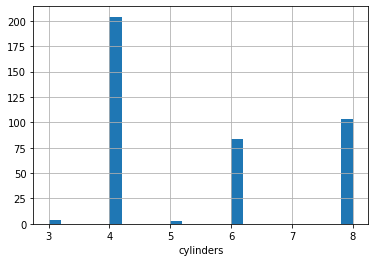

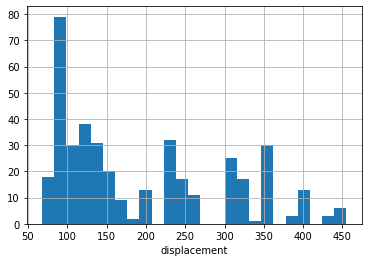

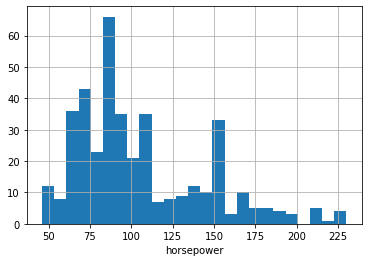

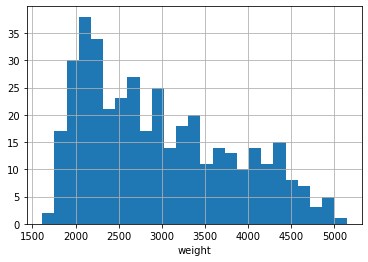

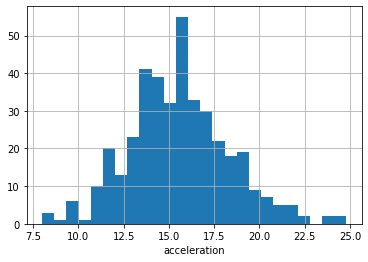

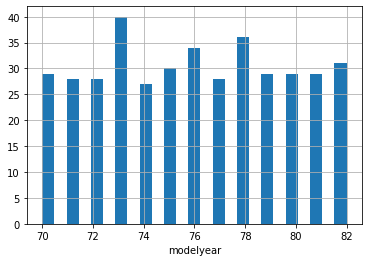

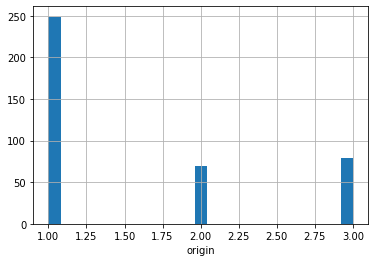

In [32]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [33]:
#We can see data is skewed,we need to change it to gaussian distribution before model building.

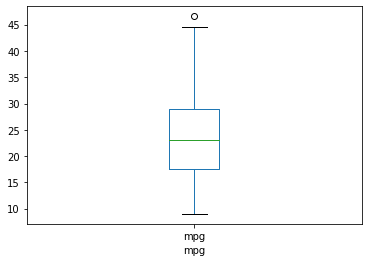

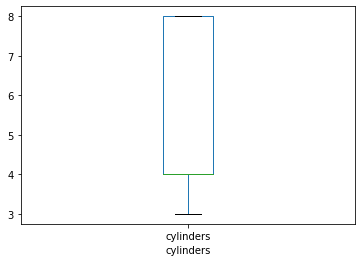

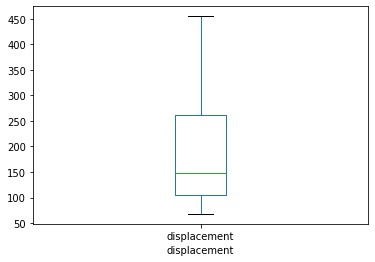

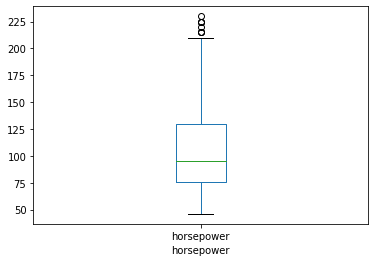

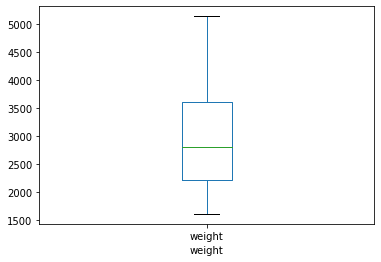

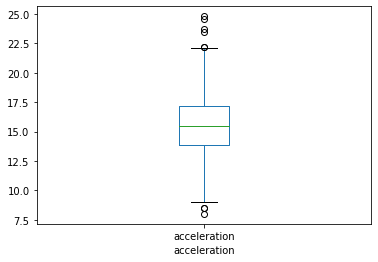

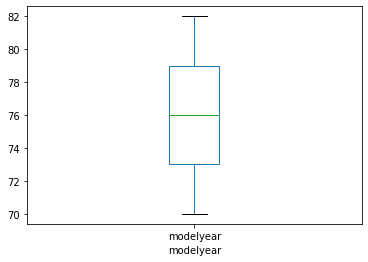

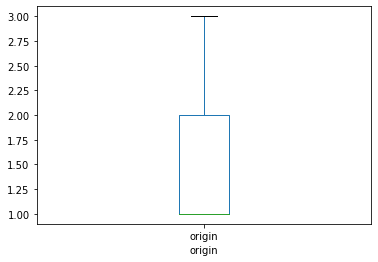

In [34]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Bivariate analysis

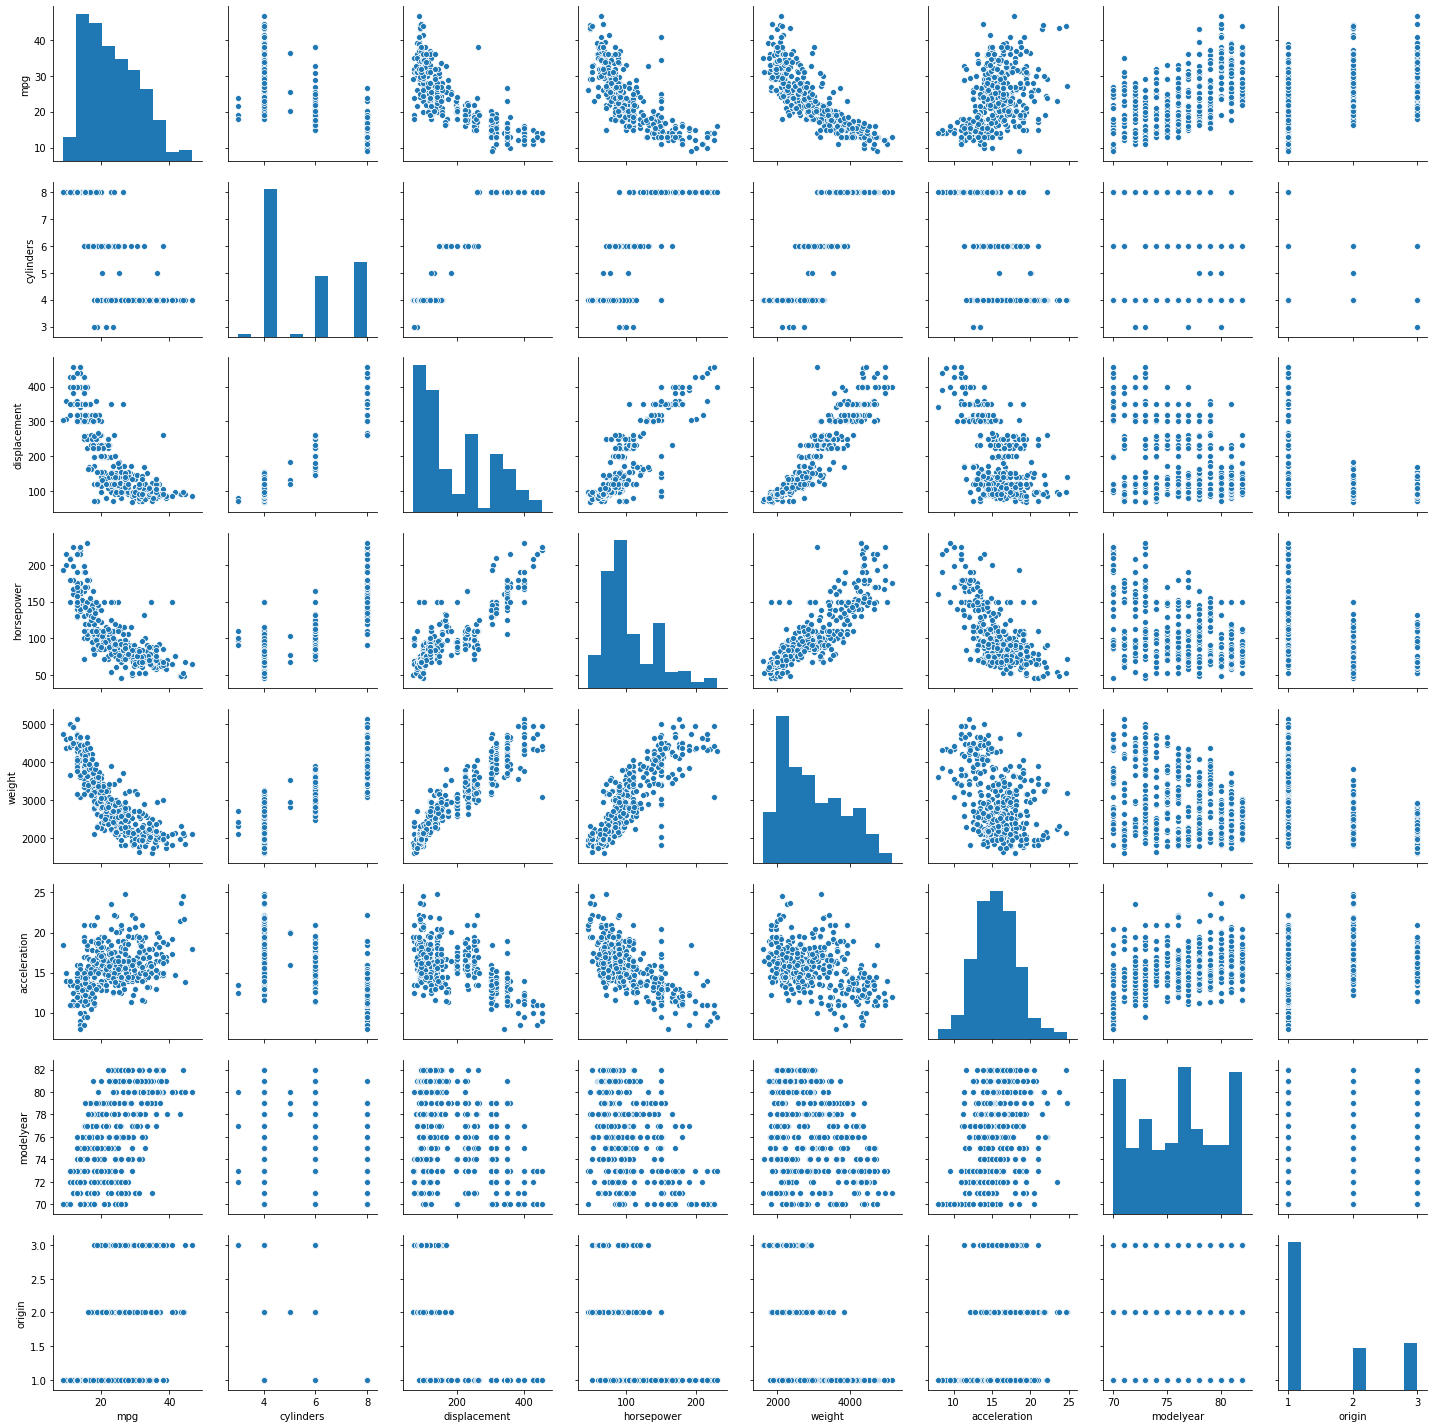

In [35]:
sns.pairplot(df)

# Feature Engineering part-2

# Removing unnecessary columns

In [15]:
df=df.drop('carname',axis=1)

# Removing skewness

In [16]:
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.033003
weight          0.531063
acceleration    0.278777
modelyear       0.011535
origin          0.923776
dtype: float64

In [17]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
modelyear         int64
origin            int64
dtype: object

# Outlier removal

In [18]:
#Removing outliers first
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(398, 8)

In [19]:
df=df[(z<3).all(axis=1)]
df.shape

(392, 8)

# Separating training and testing set

In [20]:
#Separating the training and testing set
y=df[['mpg']]
X=df.drop(['mpg'],axis=1)

In [21]:
df.skew()

mpg             0.435837
cylinders       0.545645
displacement    0.698533
horsepower      0.939271
weight          0.536422
acceleration    0.191514
modelyear       0.005700
origin          0.915185
dtype: float64

# Skewness removal by power transformation technique

In [22]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') # initally write code like this so you remember
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [23]:
df.skew()

cylinders       0.197851
displacement    0.076056
horsepower      0.024612
weight          0.000000
acceleration    0.007365
modelyear      -0.012891
origin          0.572536
dtype: float64

# Scaling the data

In [24]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [25]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,1.517831,1.137880,0.704224,0.648608,-1.354813,-1.641931,-0.716641
1,1.517831,1.560689,1.657456,0.873792,-1.544189,-1.641931,-0.716641
2,1.517831,1.246040,1.248928,0.567589,-1.733566,-1.641931,-0.716641
3,1.517831,1.108382,1.248928,0.564015,-1.354813,-1.641931,-0.716641
4,1.517831,1.088716,0.976576,0.583078,-1.922942,-1.641931,-0.716641


# Model building

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [27]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [28]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [30]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
    
    
   
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.8461115161154871


cross_val_score  - 0.6592974575558763


rmse_score  - 2.5422687922886706


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.8823068673642249


cross_val_score  - 0.6117322971966952


rmse_score  - 2.22327900632012


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.795340428352147


cross_val_score  - 0.5936793955333428


rmse_score  - 2.9318006460745543


***************** DecisionTreeRegressor *******************


DecisionTreeRegressor(crit

In [31]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,84.611152,2.542269,65.929746
1,SVR,88.230687,2.223279,61.173230
2,LinearRegression,79.534043,2.931801,59.367940
3,DecisionTreeRegressor,65.640898,3.798738,59.517381
4,GradientBoostingRegressor,86.369713,2.392604,74.489055
5,AdaBoostRegressor,84.036839,2.589273,70.320729
6,RandomForestRegressor,83.758277,2.611767,72.998810
7,XGBRegressor,84.973738,2.512140,73.105572


In [132]:
#We can see SVR is performing the best with R2 score=88.23%
#And also the RMSE score is well within range for this particular problem.

In [133]:
#But our target score is 90%
#Hence we will apply Gridsearchcv to the top3 performing model and try to reach 90% score.

In [134]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [135]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [136]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   56   which is   0.8804886676658166
knn 56
max_r2_score is at random_state   42   which is   0.8823068673642249
SVR 42
max_r2_score is at random_state   56   which is   0.86145649481616
lr 56
max_r2_score is at random_state   56   which is   0.8675342329336864
dt 56
max_r2_score is at random_state   94   which is   0.9011553011473504
gbm 94
max_r2_score is at random_state   98   which is   0.902493688108754
rfr 98
max_r2_score is at random_state   61   which is   0.9057957729315342
xgb 61
max_r2_score is at random_state   61   which is   0.8998895007467503
ada 61


# GridsearchCV

# model1->GradientBoostingRegressor(random_state=94)=90.11

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94)
gbm=GradientBoostingRegressor()

In [141]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbm,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 250}

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94)
gbm=GradientBoostingRegressor(max_depth=5,min_samples_leaf=2,n_estimators=250)
gbm.fit(x_train,y_train)
pred_gbm=rfr.predict(x_test)
score=r2_score(y_test,pred_gbm)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_gbm)))

R2_score=   0.9709238365002357
RMSE score=  1.3907098501290283


In [51]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
gbm=GradientBoostingRegressor(max_depth=5,min_samples_leaf=2,n_estimators=250)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

0.7310557220729741

# model2->XGBoostRegressor(random_state=61)=90.57

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61)
xgb=XGBRegressor()

In [37]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=gscv.fit(x_train,y_train)
grid_search.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3}

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61)
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.5, learning_rate=0.1)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_score=   0.9084721910605565
RMSE score=  2.3468732974747093


In [40]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.5, learning_rate=0.1)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

0.7750306705793059

# model3->RandomForestRegressor(random_state=98)=90.24

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98)
rfr=RandomForestRegressor()

In [144]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=100)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.9010492152508737
RMSE score=  2.428531734325854


In [57]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=100)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

0.7365759117573563

# Saving Final  XGBoostRegressor model

In [42]:
#From all the model tried above XGBoostRegressor model has highest cross_val_score .
#Hence saving the XGBoostRegressor model as our final model
#corresponding random_state=94
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61)
xgb=XGBRegressor(max_depth=3,colsample_bytree= 0.5, learning_rate=0.1)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_score=   0.9084721910605565
RMSE score=  2.3468732974747093


In [48]:
from sklearn.externals import joblib
joblib.dump(xgb,'Project10-MPG.obj')

['Project10-MPG.obj']

In [49]:
model=joblib.load('Project10-MPG.obj')

In [50]:
pred=model.predict(x_test)
pred

array([20.86712  , 23.359482 , 36.831173 , 35.040634 , 13.922803 ,
       29.549822 , 32.661148 , 14.342798 , 34.54216  , 34.42752  ,
       27.650536 , 22.273127 , 23.482922 , 19.195337 , 22.943058 ,
       22.144123 , 25.136267 , 14.7215395, 28.856651 , 33.047733 ,
       18.069796 , 28.88315  , 24.944857 , 18.107529 , 27.297632 ,
       27.454012 , 19.890692 , 33.912926 , 18.063196 , 27.667088 ,
       18.278383 , 30.446066 , 17.307505 , 18.679392 , 13.922803 ,
       24.106812 , 34.623848 , 23.00016  , 14.958425 , 26.995928 ,
       34.68148  , 23.322132 , 21.725283 , 35.56933  , 13.507626 ,
       13.062414 , 23.243235 , 17.729902 , 11.424342 , 11.46472  ,
       27.9283   , 24.196299 , 25.717215 , 18.466833 , 18.952637 ,
       13.712052 , 15.058986 , 20.00071  , 23.201128 , 38.59887  ,
       23.00016  , 12.93668  , 30.056505 , 26.59575  , 16.138912 ,
       26.642525 , 30.584146 , 28.080774 , 24.727516 , 18.974535 ,
       27.119541 , 23.94059  , 28.541552 , 26.315996 , 25.4468

# Saving final predictions in file.csv

In [51]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['mpg'])

In [52]:
final_predictions.to_csv('E:\\final_predictionsmpg.csv',index=False)

# Conclusion:-